In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import re
import nltk
import mplcursors
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from dateutil import parser
from typing import List
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [ ]:
nltk.download('stopwords')


In [ ]:
poli = pd.read_csv('politicos.csv')

In [ ]:
poli.head()

In [ ]:
poli.columns

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = poli.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
poli.groupby(['username'])['tweets_id'].count()

#### Hashtags

In [ ]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords =stopwords.words('portuguese')

In [ ]:
poli['user_name'].unique()

In [ ]:
poli.hashtags.fillna(' ')
test = poli.hashtags.astype(str).apply(lambda x: x.replace('[','').replace(']','').replace('\'','').strip())
poli.hashtags = test

*Bolsonaro nao usa hashtags?*

In [ ]:
# Lula
poli[poli.user_name == 'Jair M. Bolsonaro'].hashtags.value_counts().reset_index()

In [ ]:
hashtags = poli[poli.user_name == 'Lula'].hashtags.value_counts().reset_index().drop(0)
hashtags

In [ ]:
poli.hashtags=='#equipelula'

In [ ]:

mu = poli[(poli.hashtags=='#equipelula')].like_count.mean()
sigma = poli[(poli.hashtags=='#equipelula')].like_count.std()

In [ ]:
poli[(poli.hashtags=='#equipelula')].like_count.hist(bins=100)

In [ ]:
poli[(poli.user_name == 'Lula')].like_count.hist(bins = 100)

In [ ]:
poli[(poli.user_name == 'Lula')].shape

In [ ]:
poli[(poli.user_name == 'Lula') & (poli.hashtags != 'nan')].like_count.hist(bins = 100)

In [ ]:
poli

In [ ]:
df = poli[(poli.hashtags=='#equipelula')][['like_count','created_at']].plot()




In [ ]:
polititians = poli['user_name'].unique()
for polititian in polititians:
    hashtags = poli[poli.user_name == polititian].hashtags.value_counts().reset_index()
    print(polititian, end = ': ')
    print(f'{list(hashtags["index"][1:6])}')
    print()


In [ ]:
poli.hashtags.unique()

## Contagem de hashtags ao longo do tempo

In [ ]:
def hashtag_pattern(df: pd.DataFrame, hashtag: List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}


    timeline_df = df[['created_at', 'hashtags']].copy()

    pal = list(sns.color_palette(palette='viridis', n_colors=len(hashtag)).as_hex())

    fig = go.Figure()
    for d,p in zip(hashtag, pal):

        searcher = re.compile(d)

        hash_df = timeline_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        hash_df.created_at = hash_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        hashtag_df = hash_df[filter].groupby("created_at").count().reset_index()

        hashtag_df.created_at = pd.to_datetime(hashtag_df.created_at, format=formats[granularidade])

        hashtag_df.sort_values('created_at', inplace=True)

        print(hashtag_df)


        fig.add_trace(go.Scatter(x = hashtag_df.created_at,
                                y = hashtag_df.hashtags,
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()

    
    
    

In [65]:
hashtag_pattern(poli, ['fatossobrelula', 'equipelula'], granularidade='d')

  created_at  hashtags
4 2021-10-31        29
0 2021-11-01        14
1 2021-11-02        14
2 2021-11-03         9
3 2021-11-04         9
   created_at  hashtags
47 2021-10-27         1
53 2021-10-31         1
14 2021-11-09         1
18 2021-11-10         1
27 2021-11-15         3
29 2021-11-16         1
31 2021-11-17         1
35 2021-11-18         1
36 2021-11-19         1
37 2021-11-20         2
40 2021-11-21         1
50 2021-11-29         1
51 2021-11-30         1
0  2021-12-01         1
4  2021-12-03         2
5  2021-12-04         2
7  2021-12-06         1
10 2021-12-07         1
15 2021-12-09         2
19 2021-12-10         1
23 2021-12-12         1
32 2021-12-17         1
49 2021-12-28         2
20 2022-01-11         1
22 2022-01-12         1
24 2022-01-14         1
30 2022-01-17         2
33 2022-01-18         1
38 2022-01-21         1
42 2022-01-23         1
44 2022-01-24         2
46 2022-01-27         2
48 2022-01-28         1
52 2022-01-31         2
1  2022-02-02         

## Número de likes por hashtag

In [ ]:
poli.columns

In [ ]:
# box plot com média de likes

def box_hash(df: pd.DataFrame, hashtag: List[str], metric: str, log: bool = True) -> np.nan:
    """_summary_

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): list of hashtags to visualize
        metric (str): metric to visualize
        log (bool, optional): use log scale or not Defaults to True.

    Returns:
        np.nan: Doesn't return anything
    """




    like_df = df[[metric, 'hashtags']].copy()

    fig = go.Figure()
    
    

    for hash in hashtag:

        searcher = re.compile(hash)

        hash_df = like_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        fig.add_trace(go.Box(y=hash_df[filter][metric], name=hash))

    if log:
        fig.update_layout(yaxis_type="log")          

    fig.show()


    

In [66]:
box_hash(poli, ['equipelula','sus'], 'reply_count')

#### Wordclouds

In [ ]:
def extract_words(palavras: str):
    pat = re.compile("(?<=\')(.*?)(?=\')")
    words = pat.findall(palavras)[::2]
    return words

extract_words("teste")

In [ ]:
extract_words(poli.clean_text.iloc[0])

In [ ]:
texts = list(poli[(poli.hashtags=='#equipelula') & (poli.user_name == 'Lula')].clean_text.apply(extract_words).apply(lambda x: ' '.join(x)))
vectorizer = CountVectorizer().fit_transform(texts)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim.shape

In [ ]:
def words_candidate(candidate_name: str):
    candidate = ' '.join(list(poli[poli.user_name == candidate_name].clean_text.apply(lambda x: ' '.join(extract_words(x)))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()
    return candidate

In [ ]:
nltk.download('punkt')

In [ ]:
words_candidate('Ciro Gomes')

In [67]:
def words_hashtag(df: pd.DataFrame, candidate: str, hashtag: str):

    searcher = re.compile(hashtag)
    hash_df = df.copy()
    filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)
    hash_df.clean_text = hash_df.clean_text.apply(lambda x: extract_words(x))
    hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: x.remove(candidate) if (candidate in x) else x)
    hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: x.remove(candidate.lower()) if (candidate.lower() in x) else x)
    candidate = ' '.join(list(hash_df[(hash_df.user_name == candidate) * filter].clean_text.apply(lambda x: ' '.join(x))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()

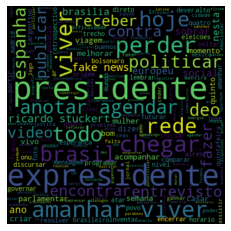

In [68]:
words_hashtag(poli, 'Lula', 'equipelula')

#### Sankey

In [ ]:
poli.columns

In [ ]:
def hash_sankey(df, hashtag, candidate, general = True):

    candidate_df = df[df.user_name==candidate].copy()

    hash_dict = {i:[] for i in hashtag}

    if general:
        limit = candidate_df.reply_count.mean()
        candidate_df['high_reply'] = candidate_df.reply_count > limit

    for hash in hashtag:
        searcher = re.compile(hash)
        filter = candidate_df.hashtags.apply(lambda x: True if searcher.search(x) else False)
        hash_df = candidate_df[filter].copy()
        if not(general):
            limit = hash_df.reply_count.mean()
            hash_df['high_reply'] = hash_df.reply_count > limit
        plot_df = hash_df.groupby("high_reply").count().reset_index()
        false = plot_df[plot_df.high_reply==False].reply_count.iloc[0] if len(plot_df[plot_df.high_reply==False].reply_count) > 0 else 0
        true = plot_df[plot_df.high_reply==True].reply_count.iloc[0] if len(plot_df[plot_df.high_reply==True].reply_count) > 0 else 0
        hash_dict[hash].extend([true,false])
        print(hash_dict)

    source = []
    target = []
    value = []

    for i, hash in enumerate(hashtag):
        source.extend(2*[i])
        value.extend(hash_dict[hash])

    target.extend(len(hashtag)*[len(hashtag), len(hashtag)+1])

    
    print(source)
    print(target)
    print(value)
    hashtag.extend(['popular','impopular'])
    print(hashtag)
    pal = list(sns.color_palette(palette='viridis', n_colors=len(hashtag)).as_hex())

    fig = go.Figure(data=[go.Sankey(
        node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = hashtag,
        color = pal
        ),
        link = dict(
        source = source, 
        target = target,
        value = value
    ))])

    fig.show()

In [69]:
hash_sankey(poli, ['equipelula','fatossobrelula','lulaaovivo'], 'Lula', general = False)

{'equipelula': [21, 49], 'fatossobrelula': [], 'lulaaovivo': []}
{'equipelula': [21, 49], 'fatossobrelula': [23, 52], 'lulaaovivo': []}
{'equipelula': [21, 49], 'fatossobrelula': [23, 52], 'lulaaovivo': [5, 5]}
[0, 0, 1, 1, 2, 2]
[3, 4, 3, 4, 3, 4]
[21, 49, 23, 52, 5, 5]
['equipelula', 'fatossobrelula', 'lulaaovivo', 'popular', 'impopular']


## Temporal

In [ ]:
poli.user_name.unique()

In [ ]:
like_df=poli[['created_at','like_count']].copy()

In [ ]:
poli[poli.user_name=='Jair M. Bolsonaro']

In [ ]:
def metric_curve(df: pd.DataFrame, metric: str, politicians=List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}

    pal = list(sns.color_palette(palette='viridis', n_colors=len(politicians)).as_hex())

    fig = go.Figure()
    for d,p in zip(politicians, pal):

        filter = df.user_name == d

        metric_df = df[filter][['created_at',metric, 'user_name']].copy()
        
        metric_df.created_at = metric_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        politician_df = metric_df[metric_df.user_name == d]

        plot_df = politician_df.groupby("created_at").sum().reset_index()

        plot_df.created_at = pd.to_datetime(plot_df.created_at, format=formats[granularidade])

        plot_df.sort_values('created_at', inplace=True)

        print(plot_df)


        fig.add_trace(go.Scatter(x = plot_df.created_at,
                                y = plot_df[metric],
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()


In [70]:
metric_curve(poli, 'like_count', ['Lula','Jair M. Bolsonaro'])

  created_at  like_count
0 2021-10-01      211627
1 2021-11-01     1615854
2 2021-12-01     2002724
3 2022-01-01     1505789
4 2022-02-01     1534049
5 2022-03-01      757618
  created_at  like_count
0 2021-09-01     1233217
1 2021-10-01     2349608
2 2021-11-01     1943334
3 2021-12-01     1842220
4 2022-01-01     2483832
5 2022-02-01     3318123
6 2022-03-01     1301403


In [ ]:
def activity_curve(df: pd.DataFrame, politicians=List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}

    pal = list(sns.color_palette(palette='viridis', n_colors=len(politicians)).as_hex())

    fig = go.Figure()
    for d,p in zip(politicians, pal):

        filter = df.user_name == d

        metric_df = df[filter][['created_at','user_name']].copy()
        
        metric_df.created_at = metric_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        politician_df = metric_df[metric_df.user_name == d]

        plot_df = politician_df.groupby("created_at").count().reset_index()

        plot_df.created_at = pd.to_datetime(plot_df.created_at, format=formats[granularidade])

        plot_df.sort_values('created_at', inplace=True)

        print(plot_df)


        fig.add_trace(go.Scatter(x = plot_df.created_at,
                                y = plot_df.user_name,
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()

In [71]:
activity_curve(poli, ['Lula','Jair M. Bolsonaro'])

  created_at  user_name
0 2021-10-01         44
1 2021-11-01        137
2 2021-12-01        123
3 2022-01-01         97
4 2022-02-01        132
5 2022-03-01         53
  created_at  user_name
0 2021-09-01         42
1 2021-10-01         90
2 2021-11-01         77
3 2021-12-01         77
4 2022-01-01         74
5 2022-02-01         88
6 2022-03-01         34


In [ ]:
def common_hours(df: pd.DataFrame, politicians=List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".
        combine (bool, optional): combining hashtags

    Returns:
        np.nan: Doesn't return anything
    """

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}

    pal = list(sns.color_palette(palette='viridis', n_colors=len(politicians)).as_hex())

    fig = go.Figure()
    for d,p in zip(politicians, pal):

        filter = df.user_name == d

        metric_df = df[filter][['created_at','user_name']].copy()
        
        metric_df.created_at = metric_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade]))

        politician_df = metric_df[metric_df.user_name == d]

        plot_df = politician_df.groupby("created_at").count().reset_index()

        plot_df.created_at = pd.to_datetime(plot_df.created_at, format=formats[granularidade])

        plot_df.sort_values('created_at', inplace=True)

        print(plot_df)


        fig.add_trace(go.Scatter(x = plot_df.created_at,
                                y = plot_df.user_name,
                                name = d,
                                line_color = p, 
                                fill=None))   #tozeroy 
                            
    
    fig.show()